# matplotlib基础

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
fig = plt.figure()

In [3]:
ax1 = fig.add_subplot(2, 2, 1) #图像是2×2的，且当前选中的是4个subplot中的第一个

In [4]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

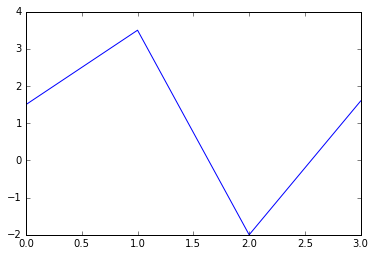

In [5]:
plt.plot([1.5, 3.5, -2, 1.6]) #在最后一个用过的subplot（没有则创建）上进行绘制

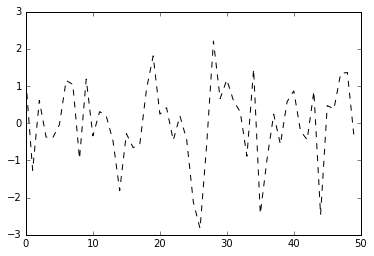

In [6]:
from numpy.random import randn
plt.plot(randn(50),'k--') #k-- 是一个线型选项，用于告诉matplotlib绘制黑色虚线图

In [7]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3) #直方图

In [8]:
import numpy as np
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

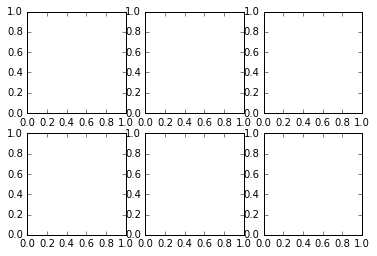

In [9]:
fig, axes = plt.subplots(2, 3)
#创建一个新的figure，并返回一个含有已创建的subplot对象的数组

In [10]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000804FBE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000851FBE0>]], dtype=object)

## 调整subplot周围的间距

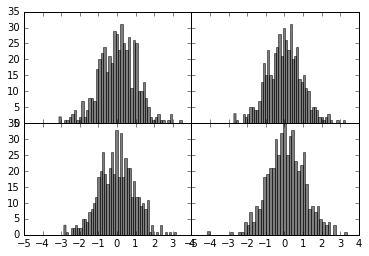

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) 
#wsapce和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距，这里设置间距为0

## 颜色、标记、线型

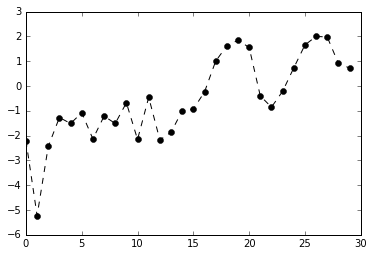

In [12]:
%matplotlib inline
plt.plot(randn(30).cumsum(), 'ko--') #相当于linestyle='--',color='k',marker='o'
#黑色 虚线 圆点

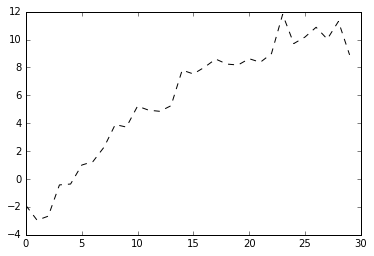

In [13]:
%matplotlib inline
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

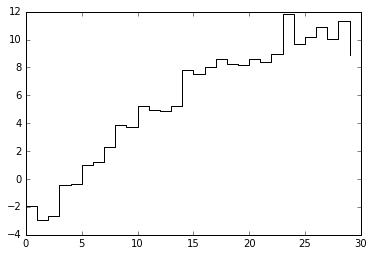

In [14]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

F:\runtime\Anoconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


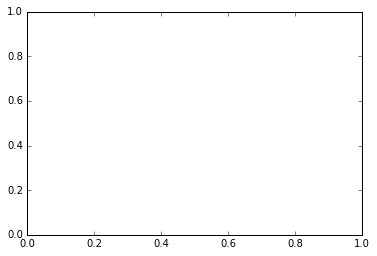

In [15]:
plt.legend(loc='best')

## 设置标题、轴标签、刻度、刻度标签

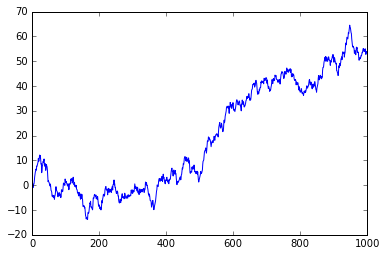

In [16]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [17]:
r = randn(10)
r

array([ 0.50277474, -0.8169461 , -1.32854461,  2.02968065, -0.61436202,
       -0.83193672, -1.43745   ,  0.19975894, -0.63622972, -0.61690619])

In [18]:
r.cumsum()

array([ 0.50277474, -0.31417135, -1.64271596,  0.38696469, -0.22739733,
       -1.05933405, -2.49678404, -2.29702511, -2.93325483, -3.55016102])

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #设置x轴的刻度

In [20]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
#设置x轴的刻度标签

In [21]:
ax.set_title('My first matplotlib plot')
#设置标题

In [22]:
ax.set_xlabel('Stages') #设置x轴的名称

根据2007年以来的标准普尔500指数收盘价格绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。

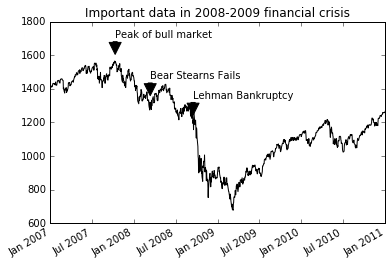

In [23]:
%matplotlib inline
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-') #DataFrame的plot方法
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left',
                verticalalignment='top')
#放大到2007~2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600, 1800]) #设置y轴的范围
ax.set_title('Important data in 2008-2009 financial crisis')